# **Exploratory Data Analysis and Data Preprocessing**

In this notebook, the dataset available in the google sheets is visualised using some EDA techniques and suitable conclusions are drawn from the same. Then basic text preprocessing is done along with resampling of the imbalanced dataset. Finally, the balanced and unbalanced datasets are saved as a csv file for later use. In the first part of the notebook, Exploratory Data Analysis is done which is followed by Data Cleaning and PreProcessing.

### ***PART 1) Exploratory Data Analysis***
* Distribution of products across the brands
* Product Category Distribution
* Product Description Sentiment Analysis
* Product Description Text Length Analysis
* Overall Word Cloud and Word Cloud for each Category's Product Description 
* Most frequent unigram words in Product Description 
 


 



## **Importing the required libraries**

In [1]:
#importing the libraries for matrix and dataframe handling, plotting, etc 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#miscellaneous libraries used
import re
import itertools
from collections import Counter
from sys import maxsize
import math
import warnings
warnings.filterwarnings("ignore")

#importing the NLP and Data Visualisation related libraries
import string
from string import ascii_letters, punctuation, digits
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## **Reading the Data:** 
The Flipkart e-commerce product dataset that was given in a Google Sheet was first downloaded as a csv file. This dataset is the one to be visualised and preprocessed and is read using the Pandas library.

In [3]:
products = pd.read_csv("/content/drive/MyDrive/Flipkart Product Dataset/flipkart_com-ecommerce_sample.csv")
products.head(15)

uniq_id  ...                             product_specifications
0   c2d766ca982eca8304150849735ffef9  ...  {"product_specification"=>[{"key"=>"Number of ...
1   7f7036a6d550aaa89d34c77bd39a5e48  ...  {"product_specification"=>[{"key"=>"Installati...
2   f449ec65dcbc041b6ae5e6a32717d01b  ...  {"product_specification"=>[{"key"=>"Ideal For"...
3   0973b37acd0c664e3de26e97e5571454  ...  {"product_specification"=>[{"key"=>"Number of ...
4   bc940ea42ee6bef5ac7cea3fb5cfbee7  ...  {"product_specification"=>[{"key"=>"Pet Type",...
5   c2a17313954882c1dba461863e98adf2  ...  {"product_specification"=>[{"key"=>"Model Name...
6   ce5a6818f7707e2cb61fdcdbba61f5ad  ...  {"product_specification"=>[{"key"=>"Number of ...
7   8542703ca9e6ebdf6d742638dfb1f2ca  ...  {"product_specification"=>[{"key"=>"Installati...
8   29c8d290caa451f97b1c32df64477a2c  ...  {"product_specification"=>[{"key"=>"Occasion",...
9   4044c0ac52c1ee4b28777417651faf42  ...  {"product_specification"=>[{"key"=>"Number of ...
10  e54bc0a7c3429da2ebef0b30331fe3d2  ...  {"product_specification"=>[{"key"=>"Occasion",...
11  c73e78fb440ff8972e0762daed4fc109  ...  {"product_specification"=>[{"key"=>"Neck", "va...
12  c29af37837afcaf44b779eca7c19295f  ...  {"product_specification"=>[{"key"=>"Pet Type",...
13  9aacdecceb404c74abddc513fd2756a8  ...  {"product_specification"=>[{"key"=>"Number of ...
14  83c53f8948f508f51d2249b489ca8e7d  ...  {"product_specification"=>[{"key"=>"Body Mater...

[15 rows x 15 columns]

From below, we can see that our dataset consists of 20k datapoints with each having approximately 15 columns. 

In [4]:
products.shape

(20000, 15)

A summary of the dataframe is shown below:

In [5]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

## **Dropping the NaN's and duplicate Product Descriptions**

Information about the NaN values over the entire dataset is given below.

In [6]:
print(products.isna().sum())

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64


The Seaborn heatmap below helps us in visualising the 'NaN' values in the entire dataset. It can be clearly observed that the columns, 'brand', 'retail_price' and 'discounted_price' have a significant amount of NaN values. As these columns do not have much contribution in helping us predict the category of a product, these 'NaN' datapoints are not dropped from the dataset.

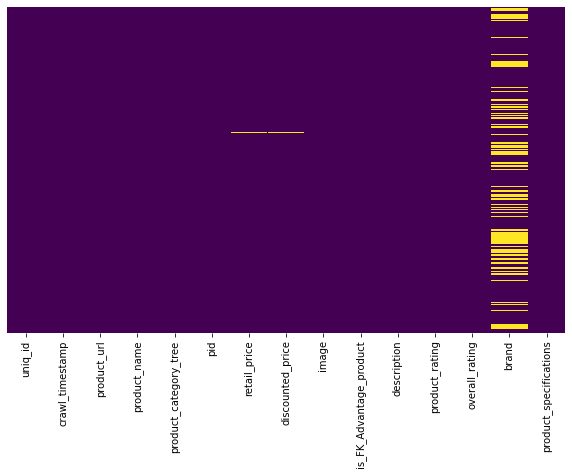

In [7]:
#heatmap showing the distribution of all the Nan's throughout the data
plt.figure(figsize=(10,6))
sns.heatmap(products.isnull(), cbar=False, yticklabels=False, cmap = 'viridis')


As we have to predict the category that a particular product belongs to, from the given dataset, only **description** column gives us useful details according to which we can predict its category. Hence, the datapoints having **description** or **product_category_tree** points as NaN cannot be included in our dataset and therefore, they are removed. Also, datapoints having duplicate descriptions are removed as well.

In [8]:
#keeping only those datapoints whose description is not NaN
products = products[products['description'].notna()]
#keeping only those datapoints product_category_tree is not NaN
products = products[products['product_category_tree'].notna()]
#dropping the datapoints with duplicate descriptions
products = products.drop_duplicates("description",keep='first', inplace=False, ignore_index=True)
products = products.reset_index(drop=True)
products

uniq_id  ...                             product_specifications
0      c2d766ca982eca8304150849735ffef9  ...  {"product_specification"=>[{"key"=>"Number of ...
1      7f7036a6d550aaa89d34c77bd39a5e48  ...  {"product_specification"=>[{"key"=>"Installati...
2      f449ec65dcbc041b6ae5e6a32717d01b  ...  {"product_specification"=>[{"key"=>"Ideal For"...
3      0973b37acd0c664e3de26e97e5571454  ...  {"product_specification"=>[{"key"=>"Number of ...
4      bc940ea42ee6bef5ac7cea3fb5cfbee7  ...  {"product_specification"=>[{"key"=>"Pet Type",...
...                                 ...  ...                                                ...
17534  3ab6fae88a53a66dd7c3cbf6fc9fbd3c  ...  {"product_specification"=>[{"key"=>"Number of ...
17535  d5a16fb788c38554feb734c15d66be6b  ...  {"product_specification"=>[{"key"=>"Number of ...
17536  43c9e22c8e9d67c0ef63f6b2d11671d7  ...  {"product_specification"=>[{"key"=>"Number of ...
17537  b90031c6daba26d176aeda12eb3960d3  ...  {"product_specification"=>[{"key"=>"Number of ...
17538  d8b681d31a99ae133659764b3fc2e06a  ...  {"product_specification"=>[{"key"=>"Number of ...

[17539 rows x 15 columns]

## **Dropping the unnecessary columns**

As mentioned earlier, only **description** and **product_category_tree** are of utmost importance in predicting the category of a product, the rest of the columns which do not contribute any meaning to our problem statement are removed. However, some columns like **product_name** and **brand** are still kept for further visualisation of the data.

In [9]:
#list of all the columns in the dataset
print(products.columns.tolist())

['uniq_id', 'crawl_timestamp', 'product_url', 'product_name', 'product_category_tree', 'pid', 'retail_price', 'discounted_price', 'image', 'is_FK_Advantage_product', 'description', 'product_rating', 'overall_rating', 'brand', 'product_specifications']


In [10]:
#dropping the columns which do not add much meaning to our problem statement
products = products.drop(['uniq_id',
               'crawl_timestamp', 
               'product_url', 
               'pid', 
               'retail_price', 
               'discounted_price',
               'image',
               'product_rating',
               'overall_rating',
               'is_FK_Advantage_product',
               'product_specifications'], axis = 1)

In [11]:
products.head()

product_name  ...         brand
0    Alisha Solid Women's Cycling Shorts  ...        Alisha
1    FabHomeDecor Fabric Double Sofa Bed  ...  FabHomeDecor
2                             AW Bellies  ...            AW
3    Alisha Solid Women's Cycling Shorts  ...        Alisha
4  Sicons All Purpose Arnica Dog Shampoo  ...        Sicons

[5 rows x 4 columns]

## **Lineplot of Products of a specific Brand**

The below lineplot helps us visualise the frequency of all the products of a particular brand that is available on Flipkart.


In [12]:
#Creating a temporary Dataframe 
temp_df = products.copy(deep=True)

# Delete the rows and having brand as NaN values 
temp_df = temp_df[temp_df['brand'].notna()]
temp_df

product_name  ...         brand
0                Alisha Solid Women's Cycling Shorts  ...        Alisha
1                FabHomeDecor Fabric Double Sofa Bed  ...  FabHomeDecor
2                                         AW Bellies  ...            AW
3                Alisha Solid Women's Cycling Shorts  ...        Alisha
4              Sicons All Purpose Arnica Dog Shampoo  ...        Sicons
...                                              ...  ...           ...
17534        Wallmantra Large Vinyl Stickers Sticker  ...    Wallmantra
17535  Wallmantra Extra Large Vinyl Stickers Sticker  ...    Wallmantra
17536  Wallmantra Extra Large Vinyl Stickers Sticker  ...    Wallmantra
17537  Wallmantra Extra Large Vinyl Stickers Sticker  ...    Wallmantra
17538             Uberlyfe Extra Large Vinyl Sticker  ...      Uberlyfe

[12273 rows x 4 columns]

In [13]:
temp_df.shape

(12273, 4)

In [14]:
#creating a list of all the unique brand names
brands_df = list(dict.fromkeys(list(temp_df.loc[:, 'brand'].values)))

brand_keys = [] #corresponds to the unique brand names
brand_freq = [] #corresponds to the count of the product for a brand

for brand in brands_df:
  #getting the count for that brand
  count = np.sum(temp_df.loc[:, 'brand'].values == brand)
  if count>=10:
    brand_keys.append(brand)
    brand_freq.append(count)

In [15]:
max_count = max(brand_freq)
idx = brand_freq.index(max_count)
print("The brand having maximum amount of products on Flipkart is {} with {} many products".format(brand_keys[idx],max_count))

The brand having maximum amount of products on Flipkart is Allure Auto with 469 many products


From the lineplot below, we can see that most of the brands have less than 100 of their products on Flipkart while some brands have around 300 of their products on Flipkart. 

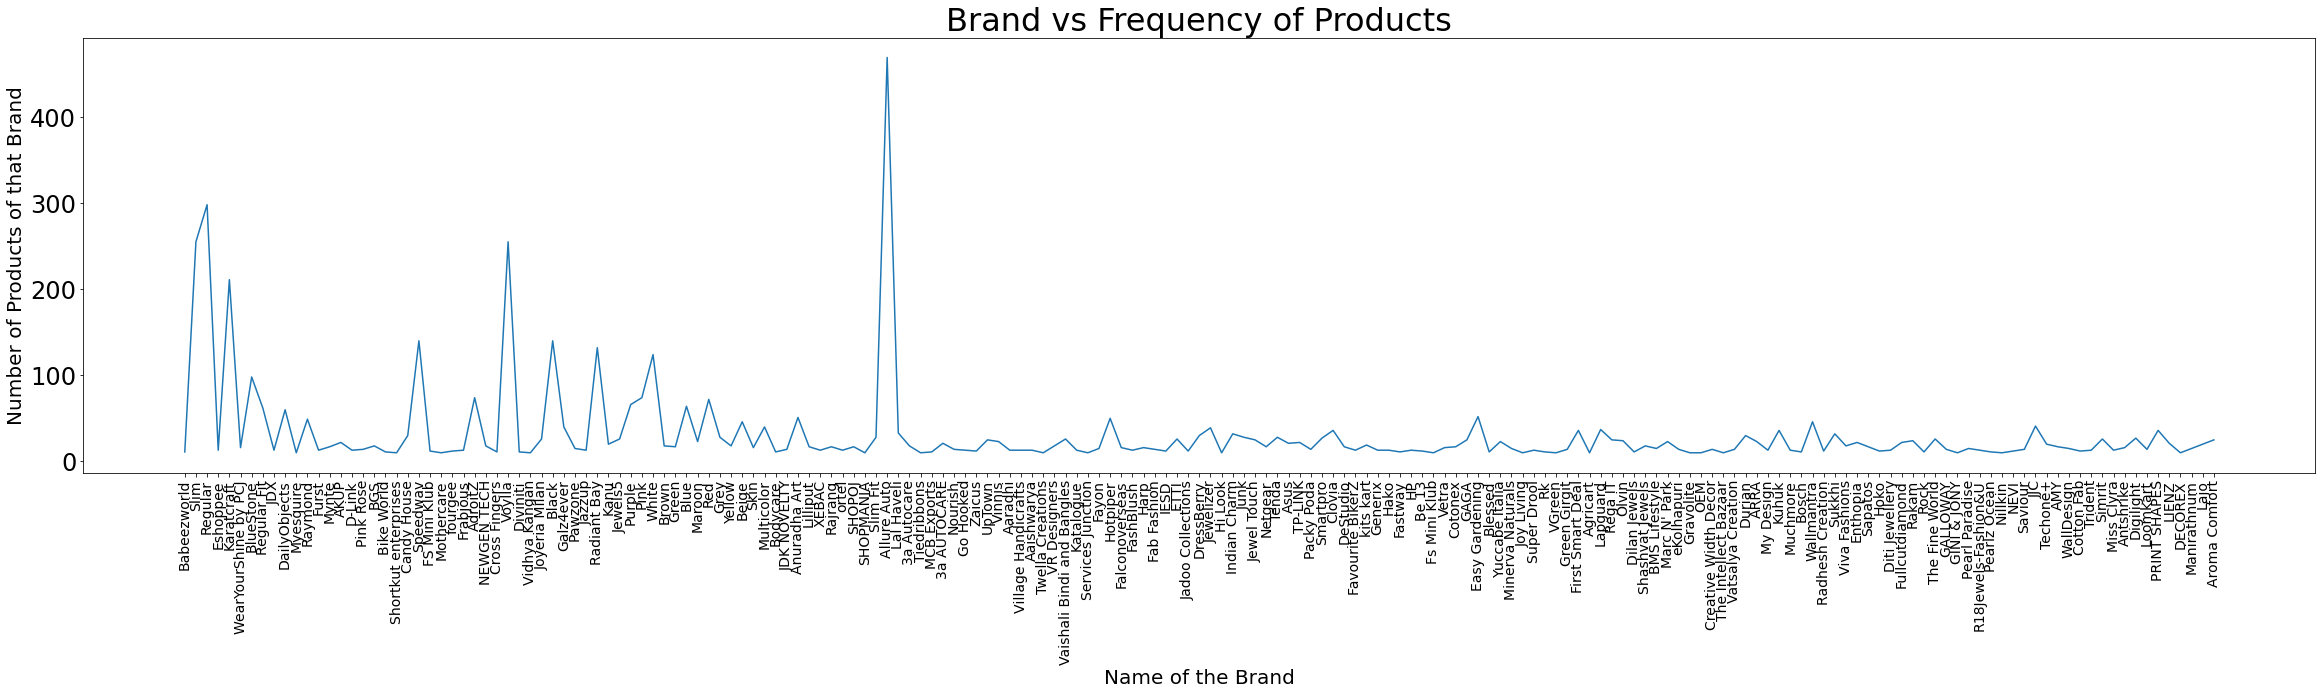

In [16]:
plt.figure(figsize=(40,8))
plt.title("Brand vs Frequency of Products", fontsize=32)
plt.ylabel("Number of Products of that Brand", fontsize=20)
plt.xlabel("Name of the Brand", fontsize=20)
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=24)
sns.lineplot(x=brand_keys, y=brand_freq)
plt.show()

## **Bar Graph of the most common words in Product Description**

A bar graph of the 40 most frequent words occuring in the Product Description is made. This has helped us in adding some words to our stopwords list like shipping, delivery, flipkart, etc (which are then removed) as they do not have much meaning/contribution in the prediction of product category.

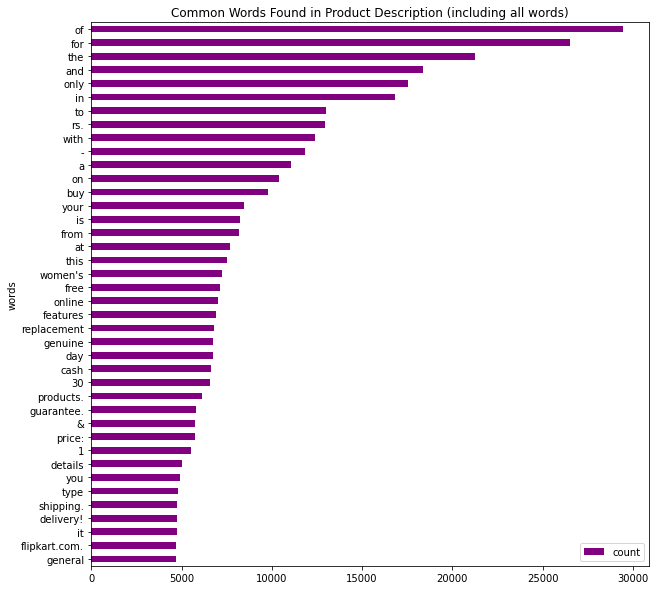

In [17]:
def most_frequent_words(description):

  for i in range(len(description)):
    description[i] = description[i].lower().split()

  all_words = list(itertools.chain(*description))
  word_counts = Counter(all_words)

  #creating a pandas dataframe of the 40 most common words in the dataset
  clean_description = pd.DataFrame(word_counts.most_common(40),
                                    columns=['words', 'count'])

  return clean_description

description = products["description"].tolist()
most_common_description = most_frequent_words(description)

fig, ax = plt.subplots(figsize=(10, 10))
# plotting the bargraph in decreasing sorted order
most_common_description.sort_values(by='count').plot.barh(x='words',
                                                          y='count',
                                                          ax=ax,
                                                          color="purple")

ax.set_title("Common Words Found in Product Description (including all words)")
plt.show()

## **Count of the different Product Categories in the Unfiltered Data**

Through the code snippet below, we are analyzing the different Product Categories and if they have more than 10 products, we are printing them as shown below.

In [18]:
categories_in_df = list(dict.fromkeys(list(products.loc[:,'product_category_tree'].values)))
print("The unique Product Categories in this dataset are {}".format(len(categories_in_df)))

for category in categories_in_df:
  count = np.sum(products.loc[:, 'product_category_tree'].values == category)
  if(count>=10):
    print(category,"\t",count)

The unique Product Categories in this dataset are 6463
["Footwear >> Women's Footwear >> Casual Shoes >> Boots"] 	 106
["Clothing >> Men's Clothing >> Jeans >> Reckler Jeans"] 	 16
["Jewellery >> Rings"] 	 692
["Clothing >> Women's Clothing >> Western Wear >> Shirts, Tops & Tunics >> Tops >> Shilpkala Tops"] 	 14
["Clothing >> Kids' Clothing >> Girls Wear >> Dresses & Skirts >> Dresses >> Herberto Dresses"] 	 10
["Clothing >> Women's Clothing >> Western Wear >> Shirts, Tops & Tunics >> Tops >> Tapyti Tops"] 	 11
["Clothing >> Women's Clothing >> Western Wear >> Shirts, Tops & Tunics >> Tops >> Cation Tops"] 	 39
["Footwear >> Women's Footwear >> Flats"] 	 59
["Mobiles & Accessories >> Tablet Accessories >> Cases & Covers >> DailyObjects Cases & Covers"] 	 60
["Clothing >> Men's Clothing >> Navaksha Men's Clothing"] 	 17
["Footwear >> Women's Footwear >> Heels"] 	 81
["Clothing >> Women's Clothing >> Western Wear >> Shirts, Tops & Tunics >> Tops >> FabAlley Tops"] 	 14
["Clothing >> Wom

From above, we can clearly see that there are many redundant Product Categories as in the Product Category Tree, a new branch arises for the Brand Name. In the code snippet below, the punctuations in the **product_category_tree** column are removed and **only the FIRST CATEGORY** is considered as the primary category for Product Categorization. This is done so in order to have significant datapoints for each category to train a better model. 

In [19]:
primary_category = products["product_category_tree"].tolist()

#lowercasing the categories to prevent duplicate categories and removal of punctuations like ">>", etc
for i in range(len(primary_category)):
  primary_category[i] = primary_category[i].lower()
  primary_category[i] = primary_category[i].replace('["',"")
  primary_category[i] = primary_category[i].replace('"]',"")
  primary_category[i] = primary_category[i].replace(" ","")
  primary_category[i] = primary_category[i].split(">>") 
  primary_category[i] = primary_category[i][0]

print(primary_category)
print(len(primary_category))

['clothing', 'furniture', 'footwear', 'clothing', 'petsupplies', 'eternalgandhisuperseriescrystalpaperweight...', 'clothing', 'furniture', 'footwear', 'clothing', 'footwear', 'clothing', 'petsupplies', 'clothing', 'pens&stationery', 'clothing', 'furniture', 'footwear', 'clothing', 'furniture', 'petsupplies', 'clothing', 'clothing', 'footwear', 'petsupplies', 'clothing', 'sports&fitness', 'beautyandpersonalcare', 'clothing', 'clothing', 'bengalbloomsroseartificialplantwithpot(3...', 'clothing', 'pens&stationery', 'pens&stationery', 'pens&stationery', 'clothing', 'pens&stationery', 'clothing', 'bags,wallets&belts', 'clothing', 'footwear', 'homedecor&festiveneeds', 'automotive', 'tools&hardware', "vishudhprintedwomen'sstraightkurta", "vishudhprintedwomen'sstraightkurta", "vishudhprintedwomen'sanarkalikurta", 'buildtrackpirwirelessmotionsensor-oneswit...', 'skayvonsummersiblesinglephasepumpcontroller...', "masarasolidwomen'sstraightkurta", "vishudhprintedwomen'sstraightkurta", 'tools&hardw

The length of the unique Product Categories after some filtering is 265


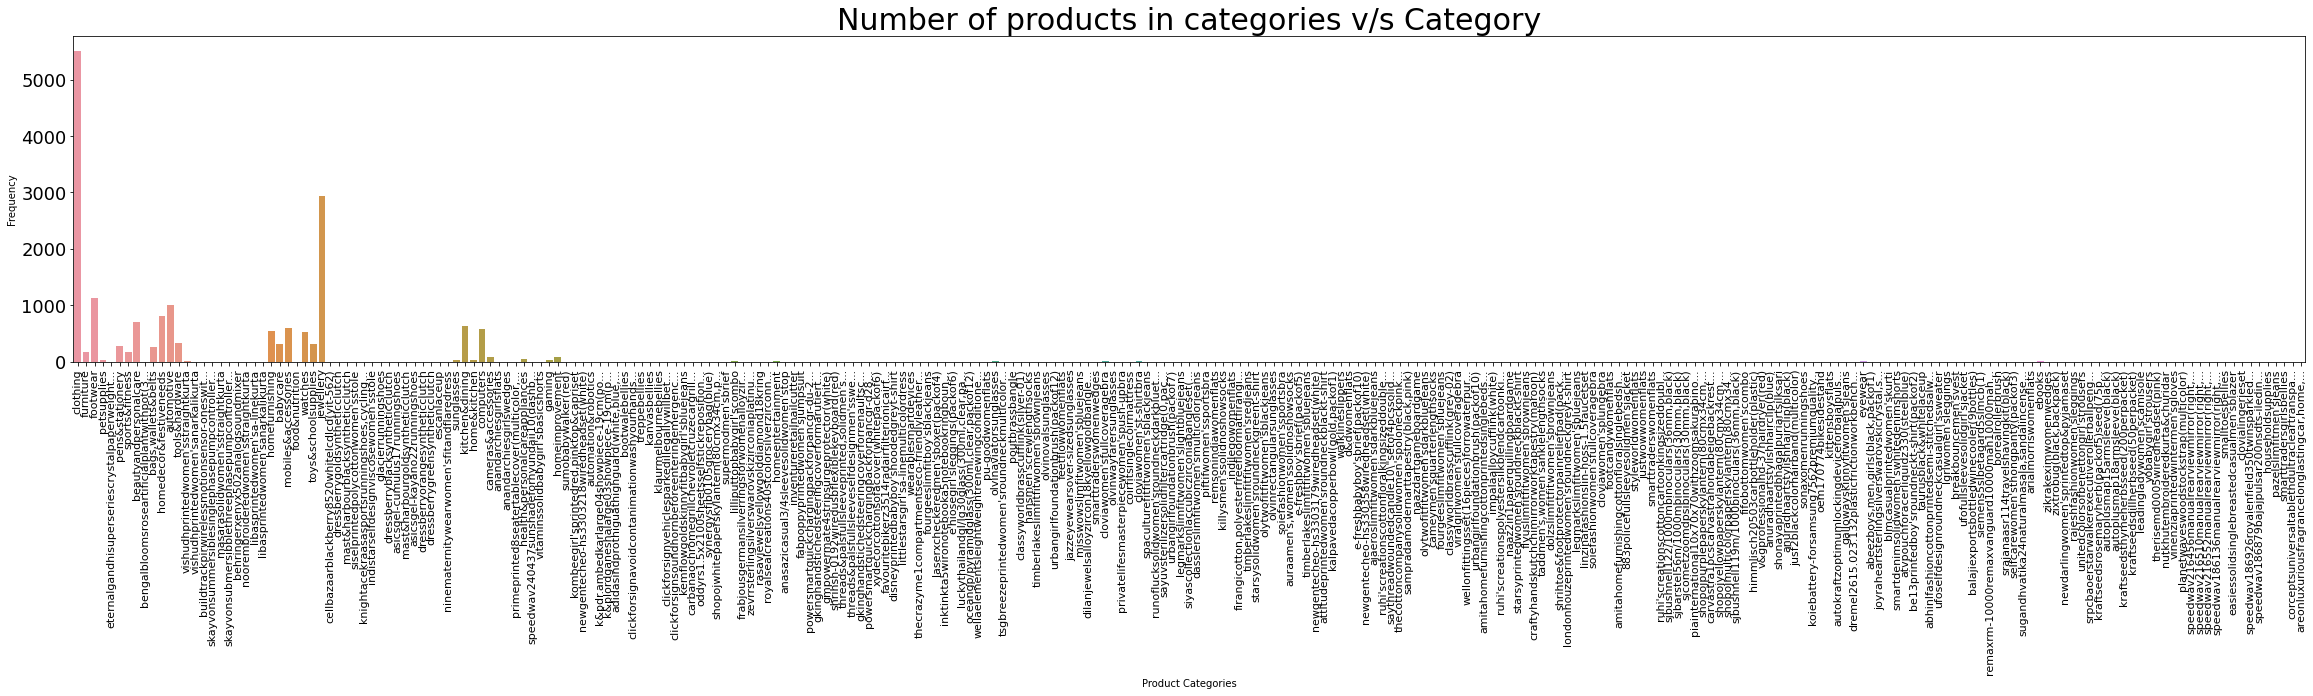

In [20]:
#filtering out some of the categories with count less than 10 
primary_category_count = Counter(primary_category)
print("The length of the unique Product Categories after some filtering is {}".format(len(primary_category_count)))

all_categories_temp=[]
count_temp=[]

for keys,vals in primary_category_count.items():
  all_categories_temp.append(keys)
  count_temp.append(vals)

plt.figure(figsize=(40,6))
plt.title("Number of products in categories v/s Category", fontsize=30)
plt.xlabel("Product Categories")
plt.ylabel("Frequency")
plt.xticks(fontsize=11,rotation=90)
plt.yticks(fontsize=18)
sns.barplot(x=all_categories_temp, y=count_temp)


From the above bargraph, we can clearly see that there is a lot of noise in the dataset as only the brand/description is sometimes mentioned in the Product Category. To visualise the relevant classes, a bargraph is plotted below that shows only those Product Categories which have at least 10 products

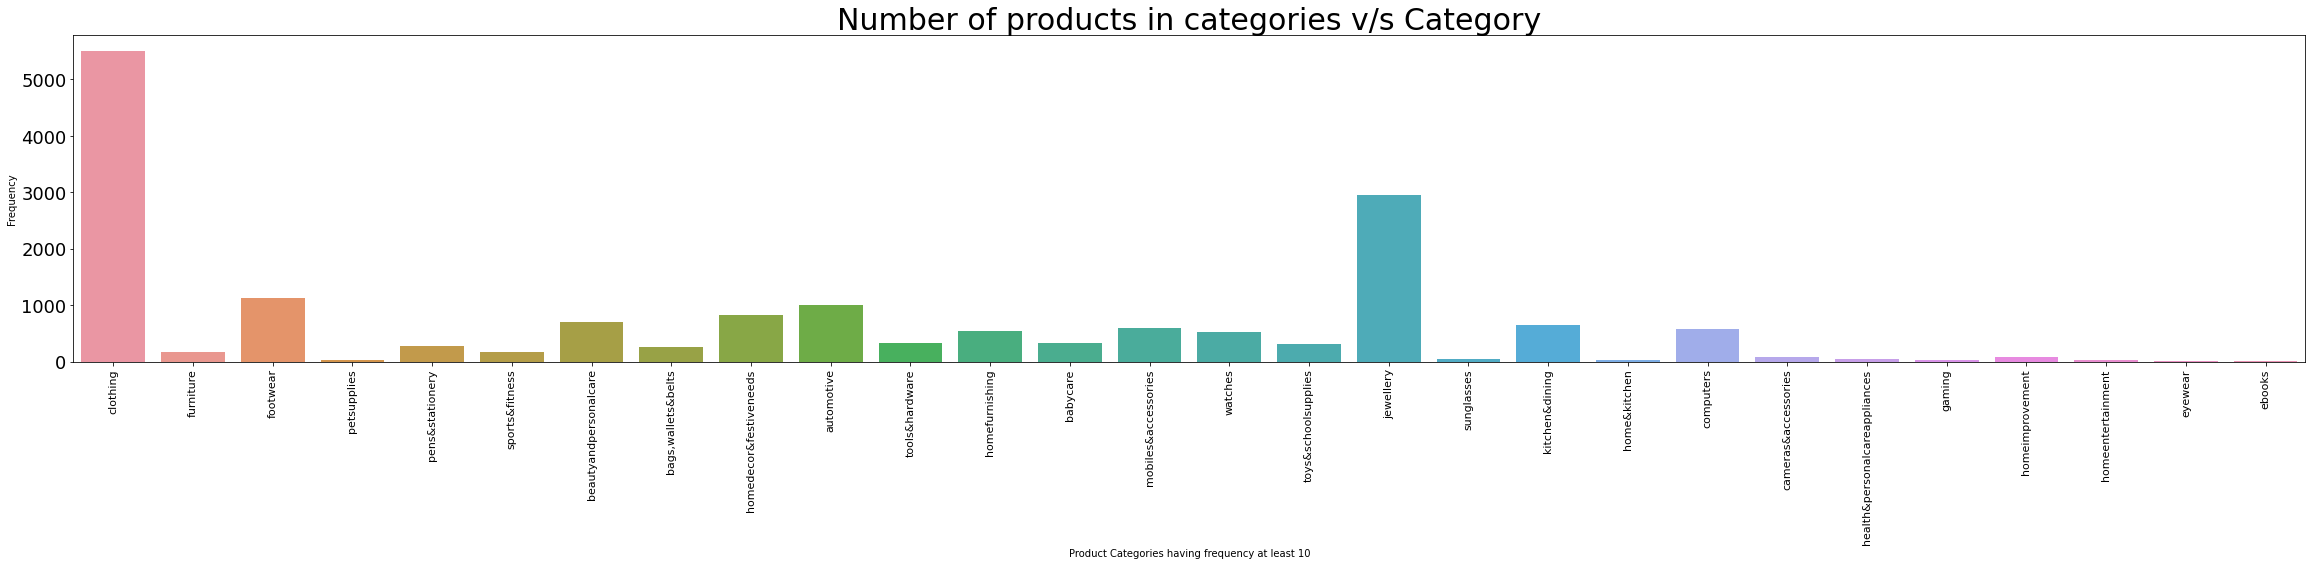

In [21]:
all_categories=[]
count=[]

for keys,vals in primary_category_count.items():
  #choosing only those categories which have at least 10 producrs
  if(vals>=10):
    all_categories.append(keys)
    count.append(vals)

plt.figure(figsize=(40,6))
plt.title("Number of products in categories v/s Category", fontsize=30)
plt.xlabel("Product Categories having frequency at least 10")
plt.ylabel("Frequency")
plt.xticks(fontsize=11,rotation=90)
plt.yticks(fontsize=18)
sns.barplot(x=all_categories, y=count)

## **Combining the redundant categories**

From the above bargraph, we can see that there are some classes which can be grouped together like **sunglasses** and **eyewear** and **homefurnishing** and **home&kitchen**. This will also help us in increasing the datapoints for each category in order to train a better model.  

In [22]:
revised_categories = [None]*len(primary_category)

for i in range(len(primary_category)):
  if primary_category[i]=="homeimprovement" or primary_category[i]=="homedecor&festiveneeds" or primary_category[i]=='home&kitchen' or primary_category[i]=="kitchen&dining" or primary_category[i]=="homefurnishing" or primary_category[i]=="furniture" or primary_category[i]=="homeentertainment":
    revised_categories[i] = 'homefurnishing/kitchen'
  elif primary_category[i]=='pens&stationery':
    revised_categories[i] = 'toys&schoolsupplies'
  elif primary_category[i]=='gaming' or primary_category[i]=='cameras&accessories' or primary_category[i]=='computers' or primary_category[i]=="mobiles&accessories":
    revised_categories[i]='electronics'
  elif primary_category[i]=='health&personal care appliances' or primary_category[i]=='beautyandpersonalcare' or primary_category[i]=='eyewear' or primary_category[i]=='sunglasses' or primary_category[i]=='watches' or primary_category[i]=='bags,wallets&belts' or primary_category[i]=='health&personalcareappliances':
    revised_categories[i]='personalaccessories'
  else:
    revised_categories[i] = primary_category[i]

print("The length of the revised grouped categories are {}".format(len(Counter(revised_categories))))
print(revised_categories)

The length of the revised grouped categories are 250
['clothing', 'homefurnishing/kitchen', 'footwear', 'clothing', 'petsupplies', 'eternalgandhisuperseriescrystalpaperweight...', 'clothing', 'homefurnishing/kitchen', 'footwear', 'clothing', 'footwear', 'clothing', 'petsupplies', 'clothing', 'toys&schoolsupplies', 'clothing', 'homefurnishing/kitchen', 'footwear', 'clothing', 'homefurnishing/kitchen', 'petsupplies', 'clothing', 'clothing', 'footwear', 'petsupplies', 'clothing', 'sports&fitness', 'personalaccessories', 'clothing', 'clothing', 'bengalbloomsroseartificialplantwithpot(3...', 'clothing', 'toys&schoolsupplies', 'toys&schoolsupplies', 'toys&schoolsupplies', 'clothing', 'toys&schoolsupplies', 'clothing', 'personalaccessories', 'clothing', 'footwear', 'homefurnishing/kitchen', 'automotive', 'tools&hardware', "vishudhprintedwomen'sstraightkurta", "vishudhprintedwomen'sstraightkurta", "vishudhprintedwomen'sanarkalikurta", 'buildtrackpirwirelessmotionsensor-oneswit...', 'skayvonsum

In [23]:
#creating a new column in the dataframe which stores these revised grouped categories
products["primary_categories"] = revised_categories
products.head(20)

product_name  ...                             primary_categories
0                 Alisha Solid Women's Cycling Shorts  ...                                       clothing
1                 FabHomeDecor Fabric Double Sofa Bed  ...                         homefurnishing/kitchen
2                                          AW Bellies  ...                                       footwear
3                 Alisha Solid Women's Cycling Shorts  ...                                       clothing
4               Sicons All Purpose Arnica Dog Shampoo  ...                                    petsupplies
5   Eternal Gandhi Super Series Crystal Paper Weig...  ...  eternalgandhisuperseriescrystalpaperweight...
6                 Alisha Solid Women's Cycling Shorts  ...                                       clothing
7                 FabHomeDecor Fabric Double Sofa Bed  ...                         homefurnishing/kitchen
8   dilli bazaaar Bellies, Corporate Casuals, Casuals  ...                                       footwear
9                 Alisha Solid Women's Cycling Shorts  ...                                       clothing
10                                     Ladela Bellies  ...                                       footwear
11                             Carrel Printed Women's  ...                                       clothing
12            Sicons All Purpose Tea Tree Dog Shampoo  ...                                    petsupplies
13                Alisha Solid Women's Cycling Shorts  ...                                       clothing
14             Freelance Vacuum Bottles 350 ml Bottle  ...                            toys&schoolsupplies
15                Alisha Solid Women's Cycling Shorts  ...                                       clothing
16                FabHomeDecor Fabric Double Sofa Bed  ...                         homefurnishing/kitchen
17                                 Style Foot Bellies  ...                                       footwear
18                             Carrel Printed Women's  ...                                       clothing
19                FabHomeDecor Fabric Double Sofa Bed  ...                         homefurnishing/kitchen

[20 rows x 5 columns]

In [24]:
temp_categories = list(dict.fromkeys(list(products.loc[:,'primary_categories'].values)))

considered_category = []
revised_category_count = {}
noise = {}
all_categories = {}

print("\n")
print("********************* THE FINAL CONSIDERED CATEGORIES AND THEIR COUNTS ARE AS FOLLOWS *************************")
print("\n")

for category in temp_categories:
  count = np.sum(products.loc[:, 'primary_categories'].values == category)
  all_categories[category]=count
    #a category is considered to be a main category only if the frequency of a product in that category is at least 10
  if(count>=10):
    print(category,count)
    revised_category_count[category] = count   
  else:
    noise[category] = count

for i in range(len(revised_categories)):
  if revised_categories[i] in revised_category_count:
    considered_category.append(1)
  else:
    considered_category.append(0)

print("\n")
print("********************* THE NOISE IN THE DATASET IS AS FOLLOWS *************************")
print("\n")
for keys,vals in noise.items():
  print(keys,vals)

print("\n")
print("********************* THE NOISE + PRIMARY CATEGORIES IN THE DATASET ARE AS FOLLOWS *************************")
print("\n")
for keys,vals in all_categories.items():
  print(keys,vals)



********************* THE FINAL CONSIDERED CATEGORIES AND THEIR COUNTS ARE AS FOLLOWS *************************


clothing 5503
homefurnishing/kitchen 2307
footwear 1123
petsupplies 30
toys&schoolsupplies 591
sports&fitness 166
personalaccessories 1578
automotive 1009
tools&hardware 333
babycare 324
electronics 1284
jewellery 2946
ebooks 15


********************* THE NOISE IN THE DATASET IS AS FOLLOWS *************************


eternalgandhisuperseriescrystalpaperweight... 1
bengalbloomsroseartificialplantwithpot(3... 1
vishudhprintedwomen'sstraightkurta 8
vishudhprintedwomen'sanarkalikurta 1
buildtrackpirwirelessmotionsensor-oneswit... 1
skayvonsummersiblesinglephasepumpcontroller... 1
masarasolidwomen'sstraightkurta 5
skayvonsubmersibblethreephasepumpcontroller... 1
behringerxenyx502analogsoundmixer 1
noorembroideredwomen'sstraightkurta 1
libasprintedwomen'sa-linekurta 1
libasprintedwomen'sanarkalikurta 1
food&nutrition 2
cellbazaarblackberry8520whitelcdlcd(yit-562) 1
dressberryg

**Visualisation of the Noise + Primary Categories**

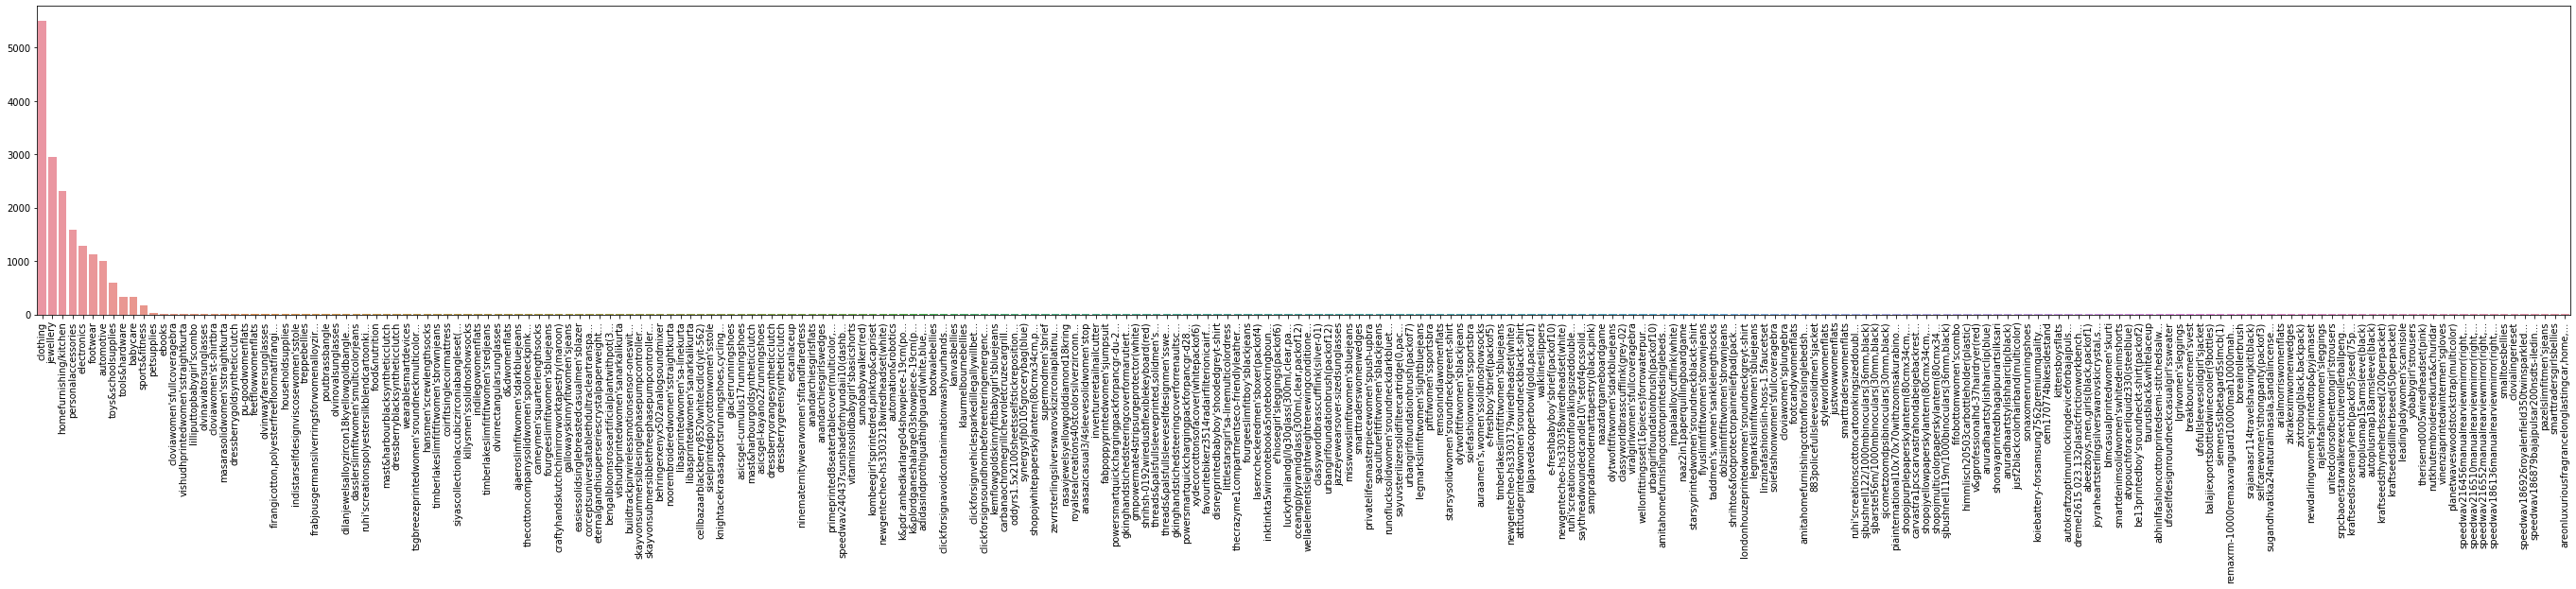

In [25]:
all_categories = dict(sorted(all_categories.items(), key=lambda item: item[1], reverse=True))

all_categories_keys = list(all_categories.keys())
all_categories_freq = list(all_categories.values())

fig = plt.figure(figsize = (48, 6))
plt.xticks(rotation=90)
sns.barplot(x=all_categories_keys ,y=all_categories_freq)

**Visualisation of only Noise in the dataset**

Noise in the dataset consists of all those Product Categories which have less than 10 products in them. From the bargraph below, we can clearly see that most of the noise in the dataset has only 1 product in its category and hence, it wasn't useful to let this noise pass through while training the model. Therefore, it is later removed from the dataset.

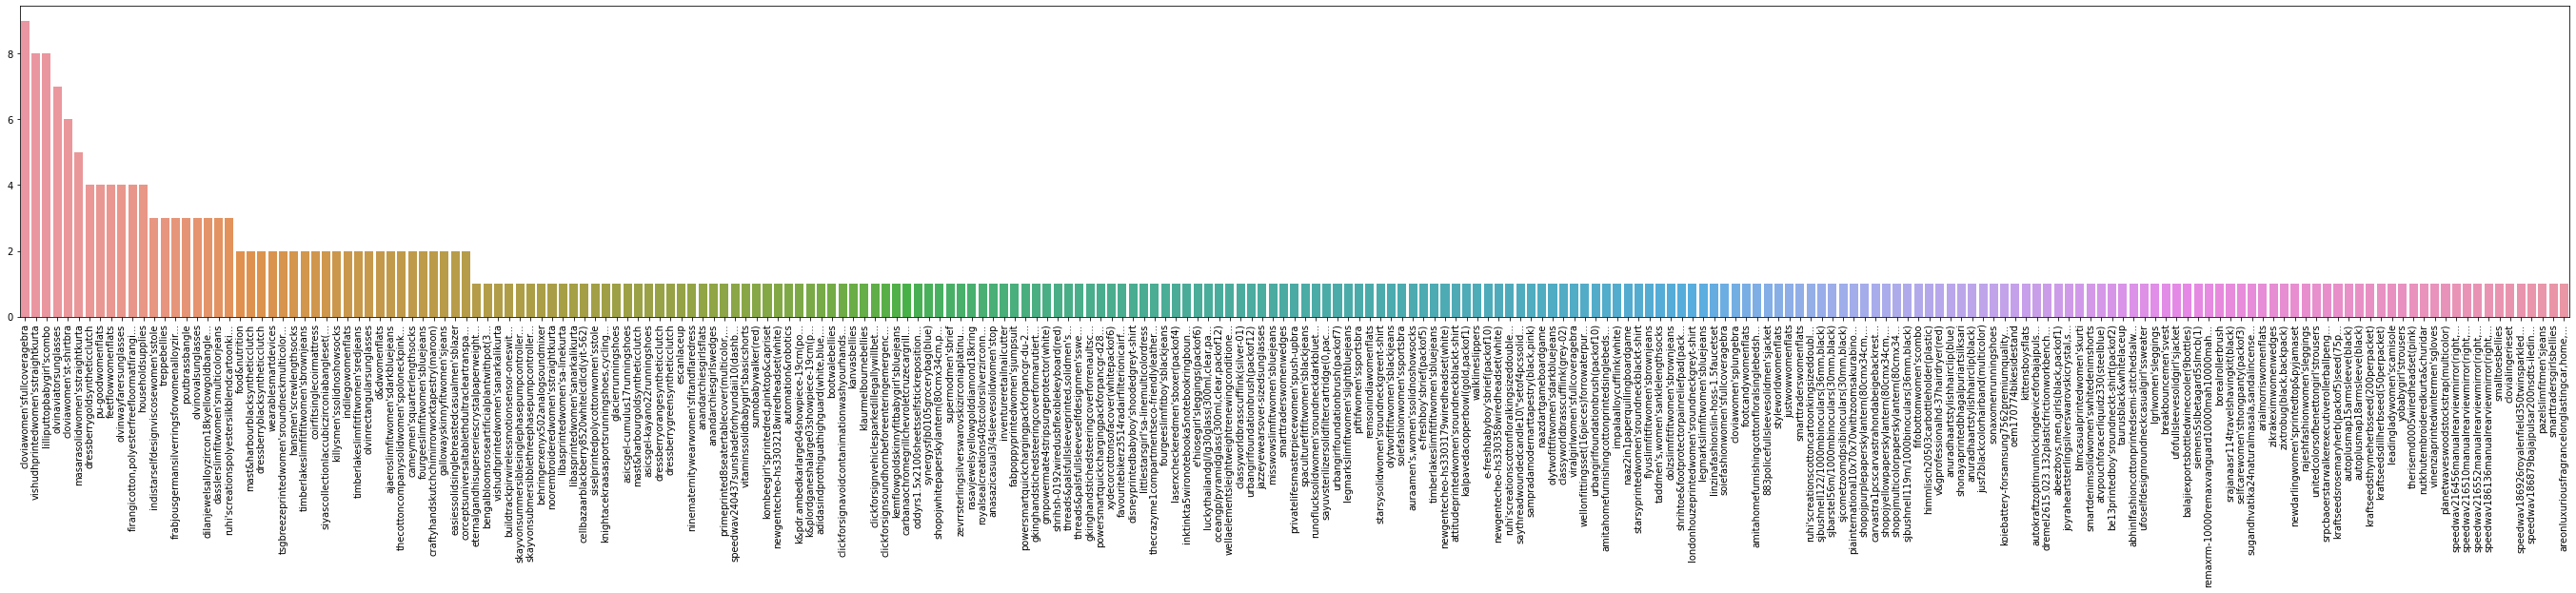

In [26]:
noise = dict(sorted(noise.items(), key=lambda item: item[1], reverse=True))

noise_keys = list(noise.keys())
noise_freq = list(noise.values())

fig = plt.figure(figsize = (48, 6))
plt.xticks(rotation=90)
sns.barplot(x=noise_keys ,y=noise_freq)

## **Frequency Plot of the revised categories**

The Bargraph shown below shows the frequency of the product in each of the final classes (total classes = 13). These are also the classes into which the final Product Categorization is done. We can see that this dataset is heavily imbalanced with **clothing** category dominating the other categories by more than 50%.

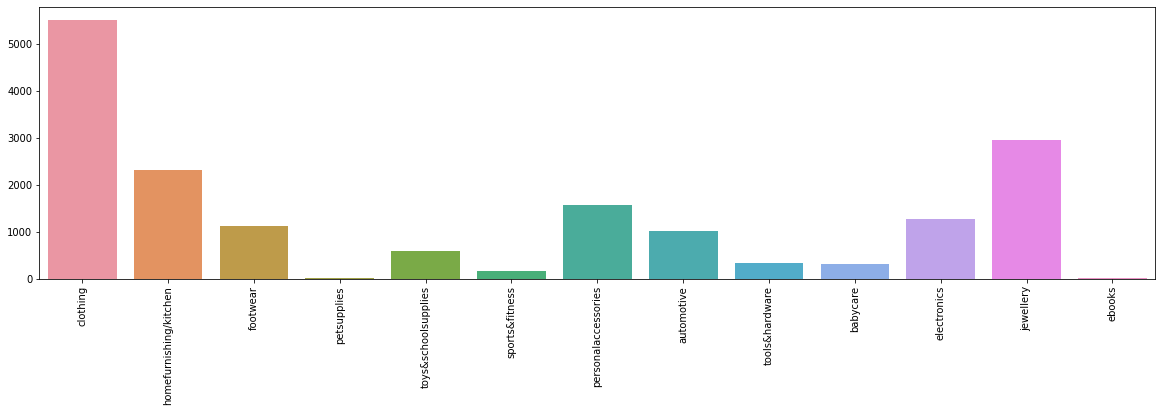

In [27]:
categories = list(revised_category_count.keys())
frequency = list(revised_category_count.values())

fig = plt.figure(figsize = (20, 5))
plt.xticks(rotation=90)
sns.barplot(x=categories,y=frequency)

A **main_category** column is added to the dataset having binary values. Its value for a particular row is 1 if that product lies in any of the above mentioned 13 classes, otherwise it is 0.

In [28]:
products["main_category"] = considered_category
products.head(25)

product_name  ... main_category
0                 Alisha Solid Women's Cycling Shorts  ...             1
1                 FabHomeDecor Fabric Double Sofa Bed  ...             1
2                                          AW Bellies  ...             1
3                 Alisha Solid Women's Cycling Shorts  ...             1
4               Sicons All Purpose Arnica Dog Shampoo  ...             1
5   Eternal Gandhi Super Series Crystal Paper Weig...  ...             0
6                 Alisha Solid Women's Cycling Shorts  ...             1
7                 FabHomeDecor Fabric Double Sofa Bed  ...             1
8   dilli bazaaar Bellies, Corporate Casuals, Casuals  ...             1
9                 Alisha Solid Women's Cycling Shorts  ...             1
10                                     Ladela Bellies  ...             1
11                             Carrel Printed Women's  ...             1
12            Sicons All Purpose Tea Tree Dog Shampoo  ...             1
13                Alisha Solid Women's Cycling Shorts  ...             1
14             Freelance Vacuum Bottles 350 ml Bottle  ...             1
15                Alisha Solid Women's Cycling Shorts  ...             1
16                FabHomeDecor Fabric Double Sofa Bed  ...             1
17                                 Style Foot Bellies  ...             1
18                             Carrel Printed Women's  ...             1
19                FabHomeDecor Fabric Double Sofa Bed  ...             1
20         Sicons Conditioning Conditoner Dog Shampoo  ...             1
21                Alisha Solid Women's Cycling Shorts  ...             1
22            dongli Printed Boy's Round Neck T-Shirt  ...             1
23                                 SWAGGA Women Clogs  ...             1
24  Kennel Rubber Dumbell With Bell - Small Rubber...  ...             1

[25 rows x 6 columns]

**Plotting the number of Brands per Category**

From the graph generated below, we can see that the most variety of brands belongs to the **home furnishing/ kitchen** category.

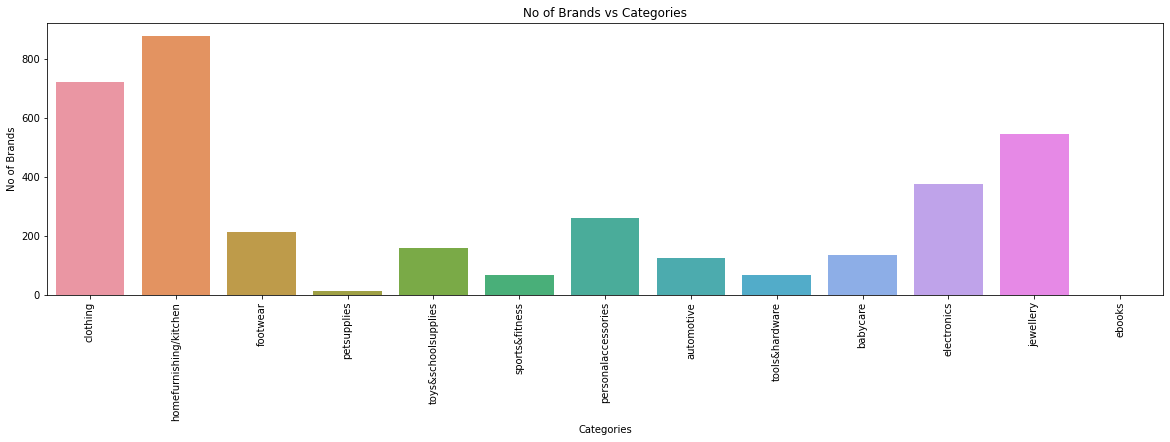

In [29]:
temp_df = products.copy(deep=True)
temp_df = temp_df[temp_df['brand'].notna()]
temp_df = temp_df[temp_df["main_category"]==1]

#list containing the revised categories
category_list = []
#list containing the number of brands corresponding to that category
brand_freq_list = []

for category in categories:
  df = temp_df[temp_df["primary_categories"]==category]
  category_brand_count = list(dict.fromkeys(list(df.loc[:,'brand'].values)))
  category_list.append(category)
  brand_freq_list.append(len(category_brand_count))

#plotting the graph
fig = plt.figure(figsize = (20, 5))
plt.xticks(rotation=90)
plt.xlabel("Categories")
plt.ylabel("No of Brands")
plt.title("No of Brands vs Categories")
sns.barplot(x=category_list,y=brand_freq_list)

## **Sentiment Analysis**

Sentiment analysis of the Product Description corresponding to each category. This is done by measuring the polarity of each product's description.

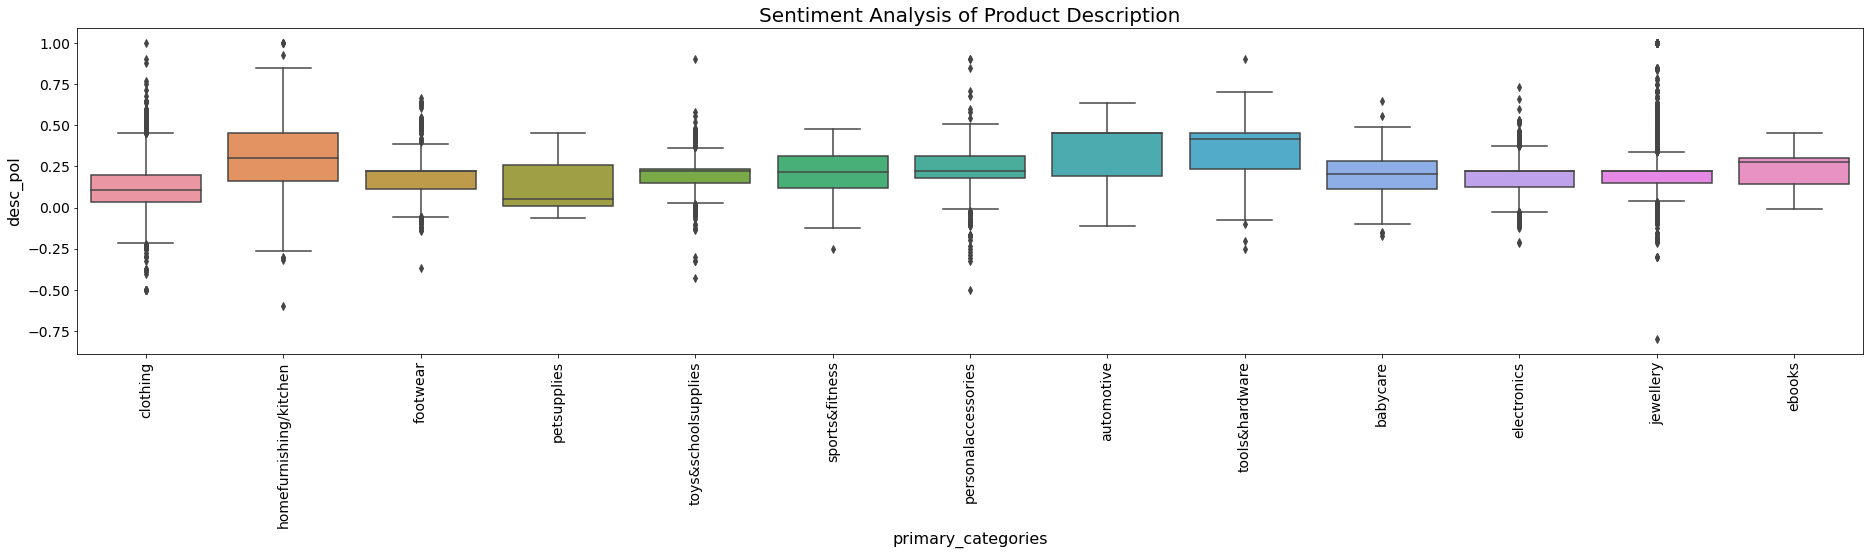

In [30]:
products['desc_pol']=products['description'].apply(lambda x : TextBlob(x).sentiment.polarity)

plt.figure(figsize=(32,6))
plt.title("Sentiment Analysis of Product Description", fontsize=20)
plt.xlabel("Polarity", fontsize=16)
plt.ylabel("Product Description", fontsize=16)
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)
sns.boxplot(x="primary_categories", y='desc_pol', data=products[products['main_category']==1])

## **Text Length Analysis**

Analysis of the length of the Product Description is done to help us get an idea about the minimum, maximum and average length of the same. This is done in order to decide whether we have to discard some datapoints having text length less than or greater to a threshold.

In [31]:
#finding the length of the description
max_desc_len = -1
desc_len_sum = 0
min_desc_len = maxsize

product_description = products["description"].tolist()

for i in range(len(product_description)):
  try:
    max_desc_len = max(max_desc_len,len(product_description[i]))
    min_desc_len = min(min_desc_len,len(product_description[i]))
    desc_len_sum+=len(product_description[i])
  except:
    pass

print("Max description length is {}.".format(max_desc_len))
print("Min description length is {}.".format(min_desc_len))
print("Average description length is {}.".format(desc_len_sum/len(product_description)))

Max description length is 5309.
Min description length is 74.
Average description length is 439.516506072182.


**Visualisation of the Minimum description length across all the categories**

From the graph below we can see that there are discrepancies in the minimum length across all the categories. **pet supplies** and **ebooks** have a minimum length almost greater than 180 while **clothing** has the minimum length. 

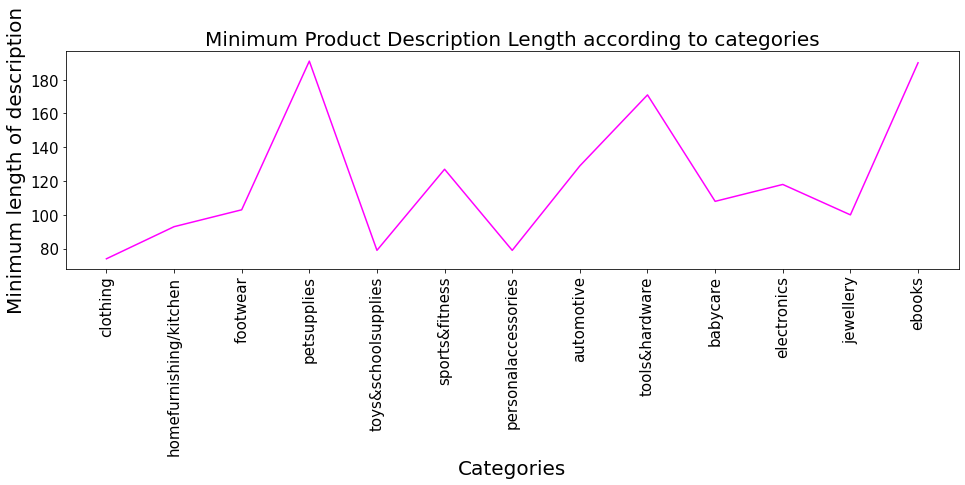

In [32]:
min_len = []
x = []

for category in temp_categories:
  temp_df = products[products["primary_categories"]==category]
  temp_df = temp_df[temp_df["main_category"]==1]
  try:
    temp_min_len = min(temp_df["description"].str.len())
    x.append(category)
    min_len.append(temp_min_len)
  except:
    pass
  

plt.figure(figsize=(16,4))
plt.title("Minimum Product Description Length according to categories", fontsize=20)
plt.ylabel("Minimum length of description", fontsize=20)
plt.xlabel("Categories", fontsize=20)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.plot(x,min_len, color = "magenta")

**Visualisation of the Maximum description length across all the categories**

From the graph below we can see that almost all the product description lengths are greater than 2000 with **jewellary** category having the greatest length for product description (greater than 5000)

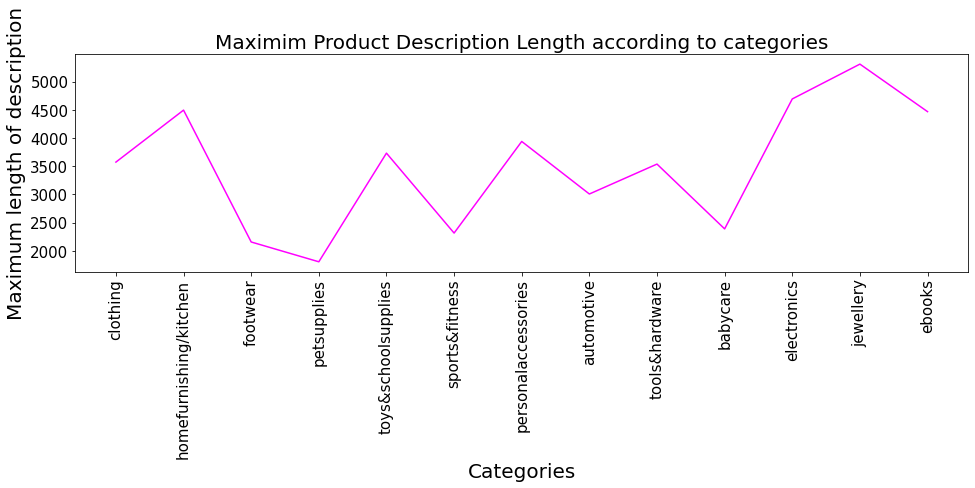

In [33]:
max_len = []
x = []

for category in temp_categories:
  temp_df = products[products["primary_categories"]==category]
  temp_df = temp_df[temp_df["main_category"]==1]
  try:
    temp_max_len = max(temp_df["description"].str.len())
    x.append(category)
    max_len.append(temp_max_len)
  except:
    pass
  

plt.figure(figsize=(16,4))
plt.title("Maximim Product Description Length according to categories", fontsize=20)
plt.ylabel("Maximum length of description", fontsize=20)
plt.xlabel("Categories", fontsize=20)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.plot(x,max_len, color = "magenta")

**Boxplot of the Average description length across all the categories**

From the boxplot, we can see that the average length for all the categories lies more or less around 1000 words. I decided to not go with a certain minimum/maximum words threshold to prevent loss of information.

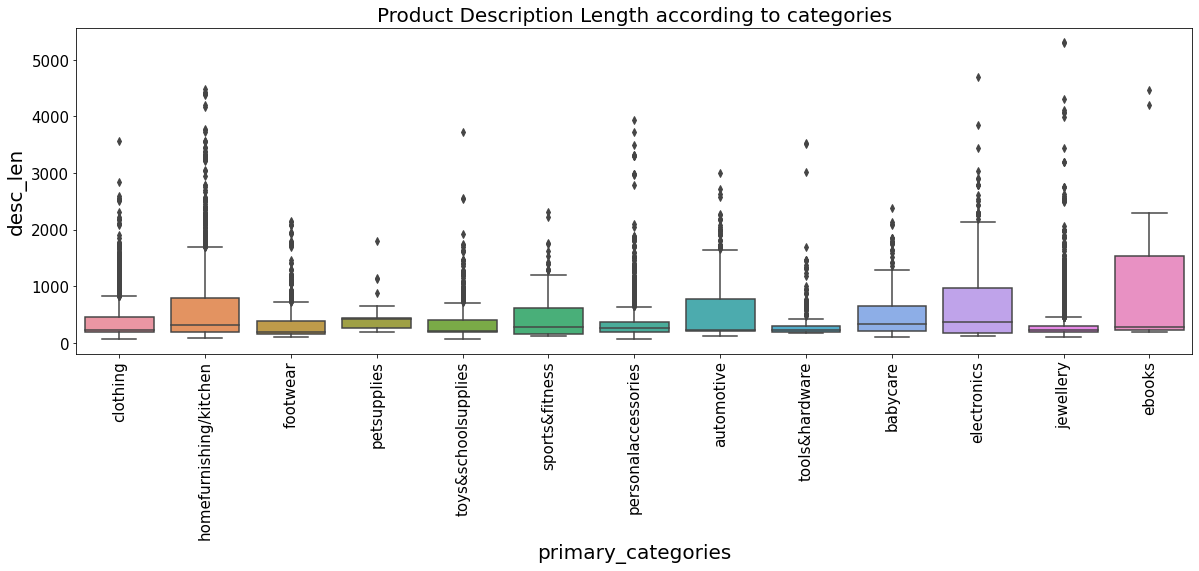

In [34]:
products["desc_len"] = products["description"].str.len()

plt.figure(figsize=(20,6))
plt.title("Product Description Length according to categories", fontsize=20)
plt.ylabel("Average of length of description", fontsize=20)
plt.xlabel("Number of Categories", fontsize=20)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
sns.boxplot(x="primary_categories", y='desc_len', data=products[products['main_category']==1])

## **Word Clouds**

**Word cloud consisting of the most frequent words in the Product Description**

This wordcloud shows the 200 most common words in the raw dataset that was provided. This wordcloud helped a lot to get an idea about removing words such as **[shipping, genuine, cash, product, delivery, flipkart, rs, etc]** as these words are common to the context of all the categories and will not contribute much to predicting the category of a particular product.

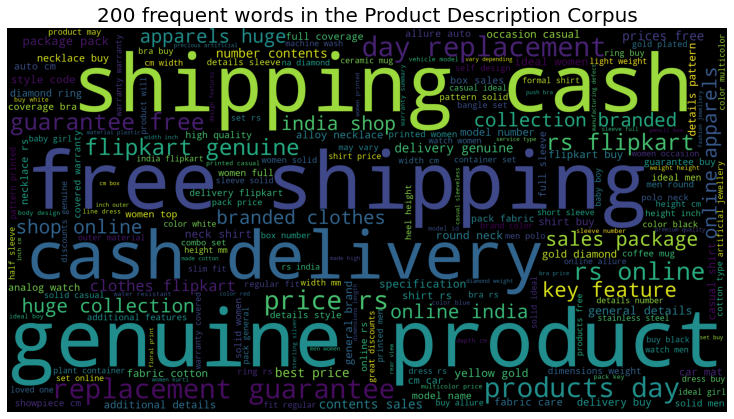

In [35]:
product_content = ""

for i in products["description"]: 
    i = str(i) 
    separate = i.split() 
    for j in range(len(separate)): 
        separate[j] = separate[j].lower() 
      
    product_content += " ".join(separate)+" "

stop_words = set(STOPWORDS)
final_wordcloud = WordCloud(width = 3000, height = 1600, 
                            max_words=200,
                            background_color ='black', 
                            stopwords = stop_words, 
                            min_font_size = 10).generate(product_content)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.title("200 frequent words in the Product Description Corpus", fontsize=20)
plt.imshow(final_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

**Word Cloud for each Category in the Corpus**

A word cloud for each category showing the 100 most common words across the product description of that category was plotted. 

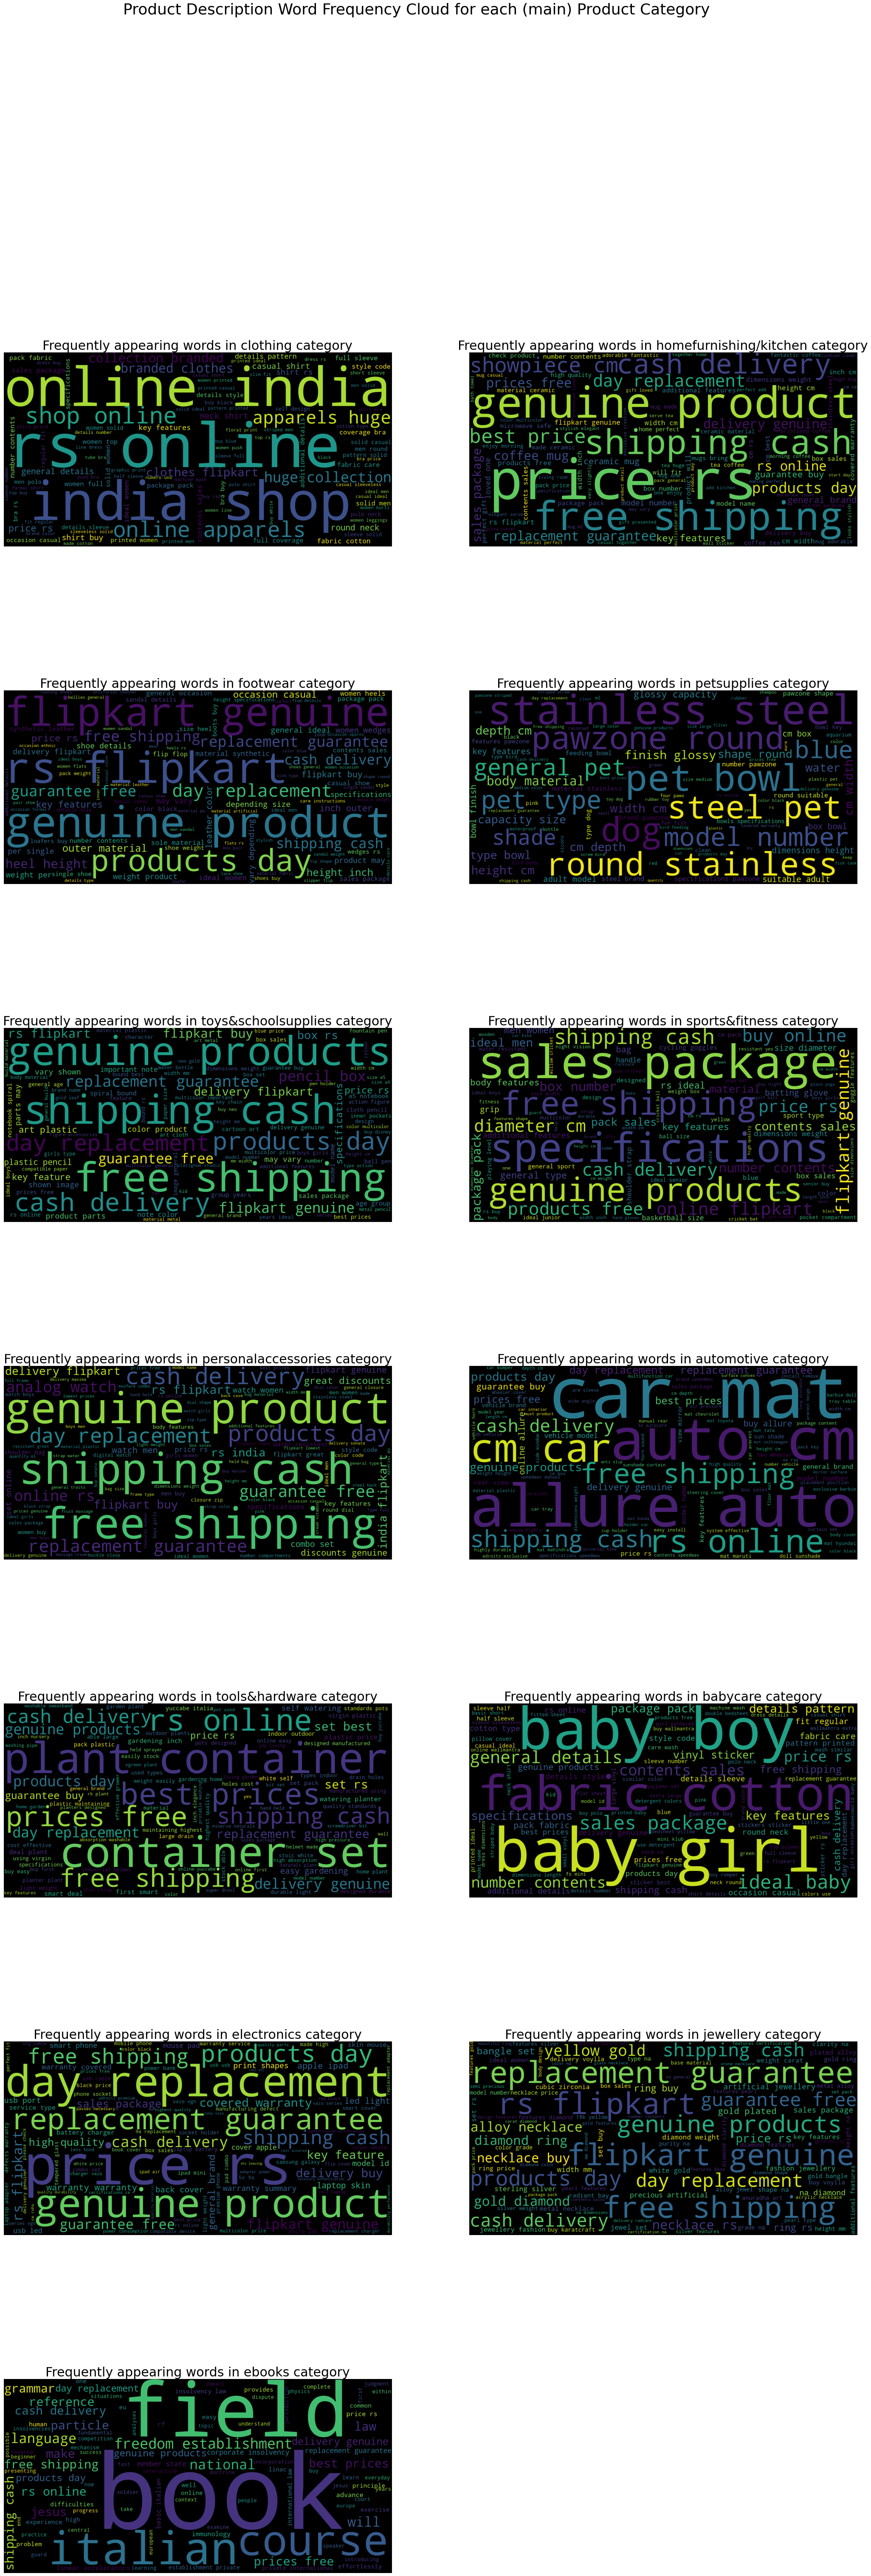

In [36]:
plt.figure(figsize = (36, 100), facecolor = None) 
plt.suptitle("Product Description Word Frequency Cloud for each (main) Product Category",fontsize=36)
j = math.ceil(len(categories)/2)

for i,c in enumerate(categories):
  temp = i+1
  desc = products[products['primary_categories']==c].description.str.lower().values
  plt.subplot(j, 2, temp).set_title("Frequently appearing words in {} category".format(c), fontsize=30)
  word_cloud = WordCloud(background_color="black",max_words=100,stopwords=STOPWORDS, width=1600, height=800, collocations=True)
  word_cloud.generate(" ".join(desc))
  plt.axis("off")
  plt.imshow(word_cloud)
plt.show()

### ***PART 2) Data Cleaning and Pre Processing***

**Character Contraction**

Character contraction is done to look at what percentage of the dataset is in English Characters. Punctuations, numbers, hyperlinks, etc will all be removed during further cleaning of the dataset.

During this analysis of the characters, we can see that there are several emoticons, letters from different languages (Chinese), etc that can be seen. These are then removed from the corpus.

In [37]:
corpus = ' '.join(products['description']).lower()
characters = Counter(corpus)
sorted(characters.items(), key=lambda i: i[1], reverse=True)

total=0
for i in ascii_letters+punctuation+digits:
  total+=characters[i]

print("The % of data consisting of only English Characters is {}.".format(100*total/len(' '.join(products['description']))))
print("\n")
print(characters)

The % of data consisting of only English Characters is 82.5440208909456.


Counter({' ': 1303425, 'e': 664539, 'a': 488535, 'o': 454480, 't': 430770, 'i': 425532, 'r': 424917, 'n': 394391, 's': 380924, 'l': 336553, 'c': 259085, 'd': 215439, 'h': 188873, 'p': 184311, 'u': 174885, 'f': 160637, 'm': 156897, 'y': 137694, 'g': 135728, 'b': 110839, '.': 91270, 'w': 84347, 'k': 70256, 'v': 53338, ',': 41369, '0': 32338, '1': 28831, '-': 27391, '\t': 23328, '9': 21749, '\n': 19353, '3': 19141, '2': 18392, ':': 18149, '5': 15294, 'x': 14744, "'": 14488, '4': 12770, 'j': 10025, 'z': 9922, '8': 8395, ')': 7951, '6': 7948, '(': 7682, '7': 6807, 'q': 6745, '!': 6321, '&': 5926, '/': 4141, '"': 1486, '%': 1130, '_': 1005, '\xa0': 747, '*': 725, '#': 672, '’': 437, '•': 407, ';': 402, '?': 386, '+': 378, '|': 241, '@': 147, 'é': 138, '=': 117, '”': 115, '�': 87, '“': 82, '–': 73, 'â': 72, '¢': 43, '®': 42, '…': 39, '\x80': 35, '°': 33, ']': 21, 'ã': 21, '[': 18, '✔': 15, '‘': 14, '±': 12, '™': 12, '‚

In [38]:
# getting all the words ending an apostrophe and single letter
contractions = Counter(re.findall("[a-z]+'[a-z]+", corpus))
apostrophe_end = sorted(contractions.items(), key=lambda i: i[1], reverse=True)
print("\n")
print(apostrophe_end)

# getting all the words starting with a single letter and an apostrophe
contractions=Counter(re.findall("[a-z]'[a-z]+", corpus))
apostrophe_start = sorted(contractions.items(), key=lambda i: i[1], reverse=True)
print("\n")
print(apostrophe_start)

#getting all the URLS
urls = re.findall('\(*http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))*', corpus)
print("\n")
print(urls)



[("women's", 7335), ("men's", 3191), ("girl's", 1062), ("boy's", 790), ("don't", 159), ("you're", 125), ("product's", 96), ("it's", 95), ("doesn't", 52), ("nod'r", 33), ("customer's", 32), ("bra's", 31), ("ruhi's", 30), ("won't", 29), ("you'll", 29), ("d'clair", 26), ("manufacturer's", 25), ("they're", 25), ("adapter's", 24), ("laptop's", 24), ("can't", 22), ("layer'r", 22), ("l'appel", 22), ("monitor's", 19), ("india's", 19), ("today's", 18), ("woman's", 17), ("bras's", 16), ("car's", 15), ("phone's", 14), ("dede's", 13), ("kid's", 12), ("baby's", 12), ("you'd", 11), ("jerry's", 11), ("world's", 10), ("company's", 10), ("model's", 9), ("scheffer's", 9), ("combo's", 9), ("what's", 8), ("wellworth's", 8), ("one's", 8), ("child's", 8), ("l'elegantae", 8), ("lord's", 8), ("computer's", 8), ("vehicle's", 7), ("finger's", 7), ("seema's", 7), ("viewer's", 7), ("there's", 7), ("buyer's", 7), ("man's", 6), ("shirt's", 6), ("i'm", 6), ("chef'n", 6), ("kb's", 6), ("wearer's", 6), ("anand's", 6

In [39]:
custom_contracts = {
    "women's" : "women",
    "men's" : "men",
    "girl's" : "girl",
    "boy's" : "boy",
    "don't" : "do not",
    "product's" : "product",
    "it's" : "its",
    "bra's" : "bras",
    "won't": "will not",
    "doesn't" : "does not",
    "l's" : " ",
    "n's" : " ",
    "y's" : " ",
    "n't" : "not",
    "r's" : "rs",
    "u're" : "your",
    "a's" : " ",
    "e's": " "
}

custom_stopwords = [w for w in set(stopwords.words("english"))]
custom_stopwords += list(punctuation)
stopwords_dataset = ["replacement","shipping","delivery","cash", "rs", "flipkart", "genuine", "details", "guarantee","free", "genuine", "flipkart.com"]
custom_stopwords.extend(stopwords_dataset)
wordnet_lemmatizer = WordNetLemmatizer()

In the following code snippet, the following things have been taken care of:

* Lowercasing
* Custom Contraction Mapping
* Keeping only the ascii characters in the corpus
* Removal of URLs/ Hyperlinks
* Removal of numbers and punctuations
* Custom Stopword Removal 
* Lemmatization
* Removal of extra whitespaces


In [40]:
def clean(text):

  for i in range(len(text)):
    text[i] = text[i].lower()
    text[i] = text[i].replace("\n"," ")
    for keys,values in custom_contracts.items():
      text[i] = text[i].replace(keys,values)
    text[i] = re.sub("[a-z]'[a-z]+", " ", text[i])
    #removing the extra whitespaces
    text[i] = re.sub(' +', ' ', text[i])
    #keeping only the ascii characters -> handles emoticons, letters from other languages, etc
    text[i] = re.sub(r'[^\x00-\x7F]+',' ', text[i])
    #removing the urls
    text[i] = re.sub('[(]?http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F])/)*', ' ', text[i])
    text[i] = ''.join([j for j in text[i] if not j.isdigit()])
    text[i] = text[i].split()
    text[i] = ' '.join([word for word in text[i] if word not in custom_stopwords])
    #removing the punctuations
    text[i] = re.sub(r'[^\w\s]', '', text[i])
    #lemmatization
    text[i] = [wordnet_lemmatizer.lemmatize(w) for w in word_tokenize(text[i])]
    #removing the words which have a length less than 3
    text[i] = [word for word in text[i] if len(word)>=3]
  
  return text

raw_description = products["description"].tolist()
cleaned_description = clean(raw_description)
print(cleaned_description[:5])

[['key', 'feature', 'alisha', 'solid', 'woman', 'cycling', 'short', 'cotton', 'lycra', 'navy', 'red', 'navyspecifications', 'alisha', 'solid', 'woman', 'cycling', 'short', 'short', 'number', 'content', 'sale', 'package', 'pack', 'fabric', 'cotton', 'lycra', 'type', 'cycling', 'short', 'general', 'pattern', 'solid', 'ideal', 'woman', 'fabric', 'care', 'gentle', 'machine', 'wash', 'lukewarm', 'water', 'bleach', 'additional', 'style', 'code', 'altht_p_', 'box', 'short'], ['fabhomedecor', 'fabric', 'double', 'sofa', 'bed', 'finish', 'color', 'leatherette', 'black', 'mechanism', 'type', 'pull', 'out', 'price', 'fine', 'deep', 'seating', 'experience', 'save', 'space', 'new', 'click', 'clack', 'sofa', 'bed', 'easy', 'fold', 'vice', 'versa', 'simple', 'click', 'clack', 'mechanism', 'chrome', 'leg', 'mango', 'wood', 'frame', 'long', 'term', 'durability', 'double', 'cushioned', 'sofa', 'bed', 'provide', 'extra', 'softness', 'make', 'fine', 'seating', 'experience', 'double', 'bed', 'easily', 'sle

## **Visualisation of the cleaned Dataset**

**Visualisation of the most common words**

40 most common words are plotted in the form of a bargraph after removal of the unnecessary data. From the bargraph, we can clearly see that these are the words which actually can help us in identifying the particular category of a product.

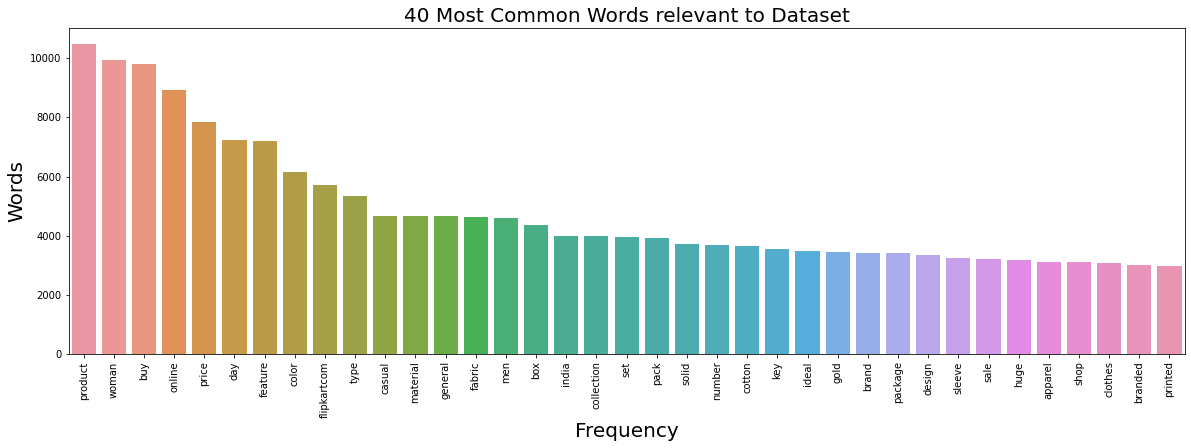

In [41]:
corpus = []
for text in cleaned_description:
  for word in text:
    corpus.append(word)

counter = Counter(corpus)
most=counter.most_common()
x, y = [], []
for word,count in most[:40]:
  if (word not in custom_stopwords):
    x.append(word)
    y.append(count)

plt.figure(figsize=(20,6))
plt.title("40 Most Common Words relevant to Dataset", fontsize=20)
plt.ylabel("Words", fontsize=20)
plt.xlabel("Frequency", fontsize=20)
plt.xticks(rotation=90)            
sns.barplot(x=x,y=y)

In [42]:
temp_cleaned_description = [" ".join(sentence) for sentence in cleaned_description]
products["cleaned_desc"] = temp_cleaned_description
products.head(10)

product_name  ...                                       cleaned_desc
0                Alisha Solid Women's Cycling Shorts  ...  key feature alisha solid woman cycling short c...
1                FabHomeDecor Fabric Double Sofa Bed  ...  fabhomedecor fabric double sofa bed finish col...
2                                         AW Bellies  ...  key feature belly sandal wedge heel casualsaw ...
3                Alisha Solid Women's Cycling Shorts  ...  key feature alisha solid woman cycling short c...
4              Sicons All Purpose Arnica Dog Shampoo  ...  specification sicons purpose arnica dog shampo...
5  Eternal Gandhi Super Series Crystal Paper Weig...  ...  key feature eternal gandhi super series crysta...
6                Alisha Solid Women's Cycling Shorts  ...  key feature alisha solid woman cycling short c...
7                FabHomeDecor Fabric Double Sofa Bed  ...  fabhomedecor fabric double sofa bed finish col...
8  dilli bazaaar Bellies, Corporate Casuals, Casuals  ...  key feature dilli bazaaar belly corporate casu...
9                Alisha Solid Women's Cycling Shorts  ...  key feature alisha solid woman cycling short c...

[10 rows x 9 columns]

**Converting the Primary Category of all Noise datapoints into Noise label**

For all the rows in the dataframe where the Main Category is 0 (i.e. noise), then the primary_category label is updated to "noise". This is done to ease the process of plotting the TSNE graphs.

In [43]:
products.loc[products['main_category'] == 0, 'primary_categories'] = "noise"
products.sample(10)

product_name  ...                                       cleaned_desc
6870   Generix Pack of 2 Micro USB On-the-go For Mobi...  ...  key feature generix pack micro usb onthego mob...
17355                         Meiro Women's A-line Dress  ...  meiro woman aline dress buy multicolor meiro w...
16332                             Yumlookup Shoulder Bag  ...  key feature yumlookup shoulder bag attractivey...
10109                               Lowe Alpine Face Cap  ...  lowe alpine face cap buy black lowe alpine fac...
15236  Pissara Alloy Cubic Zirconia Rhodium, 18K Yell...  ...  pissara alloy cubic zirconia rhodium yellow go...
16549  Manirathnum Mix Gemstone Gemstone Silver Ring ...  ...  key feature manirathnum mix gemstone gemstone ...
7205               V-GRIP Steering Cover For Suzuki Ritz  ...  key feature vgrip steering cover suzuki ritz g...
3954   Miracle Furnishings Gemstone Wooden Box Showpi...  ...  buy miracle furnishing gemstone wooden box sho...
10260                                 Vglit 7 W LED Bulb  ...  vglit led bulb white pack price white light le...
5213                           Imitzworld Alloy Necklace  ...  imitzworld alloy necklace buy imitzworld alloy...

[10 rows x 9 columns]

## **Visualization of the Overlapping of classes using TSNE Plots**

TSNE Plots are plotted after creating the Product Description's vectors. This helps us in visualization by reducing the 13 dimensional plot into a 2 dimensional plot

In [44]:
from yellowbrick.text import TSNEVisualizer

# creating the document vectors
tfidf = TfidfVectorizer()

description = tfidf.fit_transform(products["cleaned_desc"])
categories_ = products["primary_categories"]

# creating the visualizer
tsne = TSNEVisualizer()
tsne.fit_transform(description, categories_)
tsne.poof()
plt.show()

## **Dataframe consisting of categories and their counts**

The following is a dataframe consisting of the frequency of the products and the 13 major categories listed before along with the noise in the dataset.

In [45]:
temp_categories = {
    'primary_category':categories,
    'count':frequency
}


temp_categories['primary_category'].append('noise')
temp_categories['count'].append(len(noise))
category_df = pd.DataFrame(temp_categories)
category_df = category_df.sort_values(by = 'count', ascending=False)
category_df = category_df.reset_index(drop=True)
category_df

primary_category  count
0                 clothing   5503
1                jewellery   2946
2   homefurnishing/kitchen   2307
3      personalaccessories   1578
4              electronics   1284
5                 footwear   1123
6               automotive   1009
7      toys&schoolsupplies    591
8           tools&hardware    333
9                 babycare    324
10                   noise    237
11          sports&fitness    166
12             petsupplies     30
13                  ebooks     15

This preprocessed unbalanced dataset is then saved as a csv file for further training. The unbalanced dataset also contains noise in order to check the working of our model on a datset having sufficient noise as well.

In [46]:
#saving the unbalanced dataframe into drive

with open('/content/drive/MyDrive/Flipkart Product Dataset/unbalanced_products.csv', 'w') as f:
  products.to_csv(f)

## **Balancing out the Dataset**

From the above plotted bar graphs and the dataframe, we could see that the dataset is very imbalanced with more than half of the dataset residing in **clothing** and **jewellary** categories. 2 of the following dataset balancing techniques are adopted in order to ensure that there is an almost equal frequency of products for each major product category (in order to train an unbiased model and increase the accuracy).

* Oversampling
* Undersampling

### **1) Oversampling**

Random oversampling of the minority classes (i.e. classes apart from clothing and jewellary) is implemented below.  




In [47]:
# a copy of the unbalanced dataset is made on which further work is done
balanced_df = products.copy(deep=True)
balanced2_df = products.copy(deep=True)
balanced_df

product_name  ...                                       cleaned_desc
0                Alisha Solid Women's Cycling Shorts  ...  key feature alisha solid woman cycling short c...
1                FabHomeDecor Fabric Double Sofa Bed  ...  fabhomedecor fabric double sofa bed finish col...
2                                         AW Bellies  ...  key feature belly sandal wedge heel casualsaw ...
3                Alisha Solid Women's Cycling Shorts  ...  key feature alisha solid woman cycling short c...
4              Sicons All Purpose Arnica Dog Shampoo  ...  specification sicons purpose arnica dog shampo...
...                                              ...  ...                                                ...
17534        Wallmantra Large Vinyl Stickers Sticker  ...  buy wallmantra large vinyl sticker sticker onl...
17535  Wallmantra Extra Large Vinyl Stickers Sticker  ...  buy wallmantra extra large vinyl sticker stick...
17536  Wallmantra Extra Large Vinyl Stickers Sticker  ...  buy wallmantra extra large vinyl sticker stick...
17537  Wallmantra Extra Large Vinyl Stickers Sticker  ...  buy wallmantra extra large vinyl sticker stick...
17538             Uberlyfe Extra Large Vinyl Sticker  ...  uberlyfe extra large vinyl sticker pack price ...

[17539 rows x 9 columns]

Only the 13 major categories are considered and the 237 datapoints classified as noise are also removed from the dataset. This is done to help increase the accuracy of the model that will be trained further. Around 3000 samples for each category is considered in the final oversampled dataset.

In [48]:
from sklearn.utils import resample

balanced_df = balanced_df.loc[balanced_df['main_category'] == 1]

final_balanced_df = {category: balanced_df[balanced_df['primary_categories']==category] for category in set(balanced_df['primary_categories'])}

train_df = pd.concat([resample(data, n_samples=3000, replace=True, random_state=42) for data in final_balanced_df.values()])
train_df

product_name  ...                                       cleaned_desc
1523   Creative Spinach Blue Lion Fish Aquarium Toy S...  ...  buy creative spinach blue lion fish aquarium t...
16016             Pawzone Round Stainless Steel Pet Bowl  ...  specification pawzone round stainless steel pe...
16038             Pawzone Round Stainless Steel Pet Bowl  ...  key feature pawzone round stainless steel pet ...
15619    Royal Canin Maxi Starter 1kg Vegetable Dog Food  ...  specification royal canin maxi starter vegetab...
10214                  Ocean Free Sponge Aquarium Filter  ...  buy ocean sponge aquarium filter online ocean ...
...                                                  ...  ...                                                ...
826    Newworld RTNE Pack Of One -583 Tempered Glass ...  ...  key feature newworld rtne pack one tempered gl...
16845  Shine Tech canon 925 compatible for Canon LBP ...  ...  buy shine tech canon compatible canon lbp blac...
6833                kits kart Pouch for Microsoft X Plus  ...  key feature kit kart pouch microsoft plus dura...
11984     DailyObjects Back Cover for Apple iPad 2, 3, 4  ...  dailyobjects back cover apple ipad grey price ...
16775  snjmart For X Play Stereo Dynamic Earphone Wir...  ...  key feature snjmart play stereo dynamic earpho...

[39000 rows x 9 columns]

**Dataframe showing the count of the new oversampled datapoints**

In [49]:
temp_balanced_categories = {
    'primary_category':[],
    'count':[]
}

for category in categories:
  count = np.sum(train_df.loc[:, 'primary_categories'].values == category)
  temp_balanced_categories['primary_category'].append(category)
  temp_balanced_categories['count'].append(count)

category_balanced_df = pd.DataFrame(temp_balanced_categories)
category_balanced_df = category_balanced_df.sort_values(by = 'count', ascending=False)
category_balanced_df = category_balanced_df.reset_index(drop=True)
category_balanced_df

primary_category  count
0                 clothing   3000
1   homefurnishing/kitchen   3000
2                 footwear   3000
3              petsupplies   3000
4      toys&schoolsupplies   3000
5           sports&fitness   3000
6      personalaccessories   3000
7               automotive   3000
8           tools&hardware   3000
9                 babycare   3000
10             electronics   3000
11               jewellery   3000
12                  ebooks   3000
13                   noise      0

In [50]:
#saving the oversampling balanced dataframe into drive

with open('/content/drive/MyDrive/Flipkart Product Dataset/oversampling_balanced_products.csv', 'w') as f:
  train_df.to_csv(f)

### **2) Undersampling**

Random undersampling of the majority classes (i.e. clothing and jewellary) is implemented below.  

In [51]:
balanced2_df

product_name  ...                                       cleaned_desc
0                Alisha Solid Women's Cycling Shorts  ...  key feature alisha solid woman cycling short c...
1                FabHomeDecor Fabric Double Sofa Bed  ...  fabhomedecor fabric double sofa bed finish col...
2                                         AW Bellies  ...  key feature belly sandal wedge heel casualsaw ...
3                Alisha Solid Women's Cycling Shorts  ...  key feature alisha solid woman cycling short c...
4              Sicons All Purpose Arnica Dog Shampoo  ...  specification sicons purpose arnica dog shampo...
...                                              ...  ...                                                ...
17534        Wallmantra Large Vinyl Stickers Sticker  ...  buy wallmantra large vinyl sticker sticker onl...
17535  Wallmantra Extra Large Vinyl Stickers Sticker  ...  buy wallmantra extra large vinyl sticker stick...
17536  Wallmantra Extra Large Vinyl Stickers Sticker  ...  buy wallmantra extra large vinyl sticker stick...
17537  Wallmantra Extra Large Vinyl Stickers Sticker  ...  buy wallmantra extra large vinyl sticker stick...
17538             Uberlyfe Extra Large Vinyl Sticker  ...  uberlyfe extra large vinyl sticker pack price ...

[17539 rows x 9 columns]

In [52]:
# the datapoints are separated out into jewellary, clothing and non jewellary and clothing entries

jewellary_df = balanced2_df.loc[balanced2_df['primary_categories'] == 'jewellery']
clothing_df = balanced2_df.loc[balanced2_df['primary_categories'] == 'clothing']
not_jewellary_clothing = balanced2_df.loc[balanced2_df['primary_categories'] != 'clothing']
not_jewellary_clothing = not_jewellary_clothing.loc[not_jewellary_clothing['primary_categories'] != 'jewellery']
not_jewellary_clothing = not_jewellary_clothing.loc[not_jewellary_clothing['main_category'] == 1]

print(jewellary_df.shape, clothing_df.shape, not_jewellary_clothing.shape)

(2946, 9) (5503, 9) (8760, 9)


Only the 13 major categories are considered and the 237 datapoints classified as noise are also removed from the dataset. This is done to help increase the accuracy of the model that will be trained further. Around 1700 samples for clothing and jewellary categories are considered in the final undersampled dataset. This number is chosen by keeping the frequency of the other categories in mind while trying not to lose useful information during undersampling.

In [53]:
clothing_down = resample(clothing_df, replace = False, n_samples = 1700, random_state = 42)
jewellary_down = resample(jewellary_df, replace = False, n_samples = 1700, random_state = 42)

print(clothing_down.shape, jewellary_down.shape)

(1700, 9) (1700, 9)


In [54]:
undersampled_bal = pd.concat([clothing_down, jewellary_down, not_jewellary_clothing])
undersampled_bal = undersampled_bal.reset_index(drop=True)
undersampled_bal

product_name  ...                                       cleaned_desc
0      Northern Lights Striped Men's Round Neck T-Shirt  ...  northern light striped men round neck tshirt b...
1                          ShowTime Women's T-Shirt Bra  ...  showtime woman tshirt bra buy black showtime w...
2       Cotton Fab Printed Women's Maternity Wear Kurti  ...  key feature cotton fab printed woman maternity...
3                   Inmark Men's Checkered Formal Shirt  ...  inmark men checkered formal shirt price put co...
4                      killys Men's Solid No Show Socks  ...  key feature killys men solid show sock cotton ...
...                                                 ...  ...                                                ...
12155           Wallmantra Large Vinyl Stickers Sticker  ...  buy wallmantra large vinyl sticker sticker onl...
12156     Wallmantra Extra Large Vinyl Stickers Sticker  ...  buy wallmantra extra large vinyl sticker stick...
12157     Wallmantra Extra Large Vinyl Stickers Sticker  ...  buy wallmantra extra large vinyl sticker stick...
12158     Wallmantra Extra Large Vinyl Stickers Sticker  ...  buy wallmantra extra large vinyl sticker stick...
12159                Uberlyfe Extra Large Vinyl Sticker  ...  uberlyfe extra large vinyl sticker pack price ...

[12160 rows x 9 columns]

**Dataframe showing the count of the new undersampled datapoints**

In [55]:
temp_undersampled = {
    'primary_category':[],
    'count':[]
}

for category in categories:
  count = np.sum(undersampled_bal.loc[:, 'primary_categories'].values == category)
  temp_undersampled['primary_category'].append(category)
  temp_undersampled['count'].append(count)

underbalanced_count = pd.DataFrame(temp_undersampled)
underbalanced_count = underbalanced_count.sort_values(by = 'count', ascending=False)
underbalanced_count = underbalanced_count.reset_index(drop=True)
underbalanced_count

primary_category  count
0   homefurnishing/kitchen   2307
1                 clothing   1700
2                jewellery   1700
3      personalaccessories   1578
4              electronics   1284
5                 footwear   1123
6               automotive   1009
7      toys&schoolsupplies    591
8           tools&hardware    333
9                 babycare    324
10          sports&fitness    166
11             petsupplies     30
12                  ebooks     15
13                   noise      0

In [56]:
#saving the undersampling balanced dataframe into drive

with open('/content/drive/MyDrive/Flipkart Product Dataset/undersampling_balanced_products.csv', 'w') as f:
  undersampled_bal.to_csv(f)